In [262]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [225]:
df=pd.read_csv('Downloads\\parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [226]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [227]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [228]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [229]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### Exploring the status attibute

In [230]:
q=df.groupby('status')['status'].count()
q

status
0     48
1    147
Name: status, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

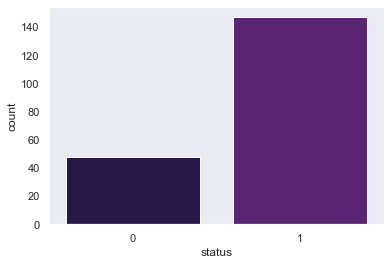

In [231]:
sns.set(style='dark', color_codes=True,palette="magma")
sns.countplot(df.status)

### preparing X , Y

In [232]:
Y=df.status
X=df
X.drop(['status','name'],axis=1,inplace=True)

### Scaling the data 

In [233]:
X=(X-X.mean())/X.std() # standarization
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.827171,-0.435045,-0.949593,0.334054,0.747835,0.132621,0.758847,0.131417,0.744070,0.737637,...,0.332130,0.605972,-0.067719,-0.192729,-0.805764,1.756293,0.799266,0.479243,-0.209990,0.866655
1,-0.768992,-0.529611,-0.057572,0.713581,1.035010,0.452726,1.273531,0.451521,1.677413,1.763924,...,1.156477,1.544279,-0.137489,-0.632879,-0.386529,1.832844,1.476053,1.307819,0.274371,1.798974
2,-0.907141,-0.721312,-0.109593,0.882719,1.322186,0.718919,1.581616,0.719960,1.199605,1.024997,...,0.697392,1.172305,-0.290884,-0.279042,-0.660375,1.937062,1.138515,1.015070,-0.103363,1.399060
3,-0.907286,-0.647425,-0.113935,0.773398,1.322186,0.577399,1.280780,0.576194,1.336955,1.204598,...,0.804787,1.336788,-0.279998,-0.280624,-0.611559,1.827676,1.437245,1.290518,0.061985,1.802314
4,-0.923281,-0.604689,-0.130272,1.365379,1.896537,1.092937,2.041931,1.093977,1.831733,1.548404,...,1.213715,1.894585,-0.177569,-0.505444,-0.781010,1.904461,1.776368,0.095948,-0.129692,2.261262


### Data visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MDVP:Fo(Hz)'),
  Text(1, 0, 'MDVP:Fhi(Hz)'),
  Text(2, 0, 'MDVP:Flo(Hz)'),
  Text(3, 0, 'MDVP:Jitter(%)'),
  Text(4, 0, 'MDVP:Jitter(Abs)'),
  Text(5, 0, 'MDVP:RAP'),
  Text(6, 0, 'MDVP:PPQ'),
  Text(7, 0, 'Jitter:DDP'),
  Text(8, 0, 'MDVP:Shimmer'),
  Text(9, 0, 'MDVP:Shimmer(dB)')])

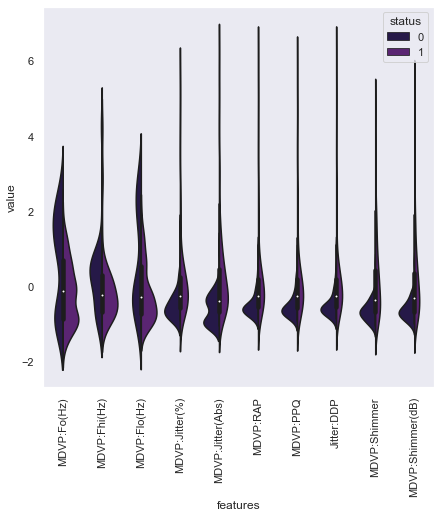

In [234]:
data = pd.concat([Y,X.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='status',var_name='features',value_name='value')
plt.figure(figsize=(7,7))
sns.violinplot('features','value',hue='status',data=data,split=True,)
plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Shimmer:APQ3'),
  Text(1, 0, 'Shimmer:APQ5'),
  Text(2, 0, 'MDVP:APQ'),
  Text(3, 0, 'Shimmer:DDA'),
  Text(4, 0, 'NHR'),
  Text(5, 0, 'HNR'),
  Text(6, 0, 'RPDE'),
  Text(7, 0, 'DFA'),
  Text(8, 0, 'spread1'),
  Text(9, 0, 'spread2'),
  Text(10, 0, 'D2'),
  Text(11, 0, 'PPE')])

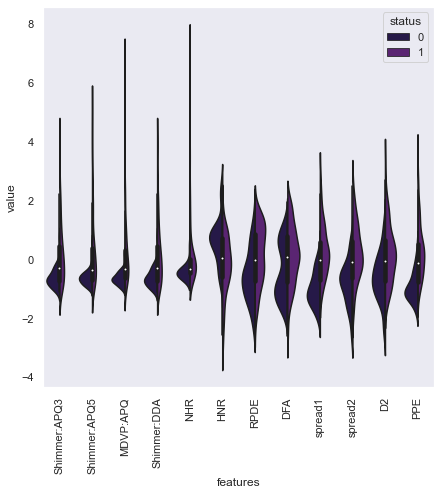

In [235]:
data = pd.concat([Y,X.iloc[:,10:]],axis=1)
data=pd.melt(data,id_vars='status',var_name='features',value_name='value')
plt.figure(figsize=(7,7))
sns.violinplot('features','value',hue='status',data=data,split=True,)
plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'MDVP:Fo(Hz)'),
  Text(1, 0, 'MDVP:Fhi(Hz)'),
  Text(2, 0, 'MDVP:Flo(Hz)'),
  Text(3, 0, 'MDVP:Jitter(%)'),
  Text(4, 0, 'MDVP:Jitter(Abs)'),
  Text(5, 0, 'MDVP:RAP'),
  Text(6, 0, 'MDVP:PPQ'),
  Text(7, 0, 'Jitter:DDP'),
  Text(8, 0, 'MDVP:Shimmer'),
  Text(9, 0, 'MDVP:Shimmer(dB)'),
  Text(10, 0, 'Shimmer:APQ3'),
  Text(11, 0, 'Shimmer:APQ5'),
  Text(12, 0, 'MDVP:APQ'),
  Text(13, 0, 'Shimmer:DDA'),
  Text(14, 0, 'NHR'),
  Text(15, 0, 'HNR'),
  Text(16, 0, 'RPDE'),
  Text(17, 0, 'DFA'),
  Text(18, 0, 'spread1'),
  Text(19, 0, 'spread2'),
  Text(20, 0, 'D2'),
  Text(21, 0, 'PPE')])

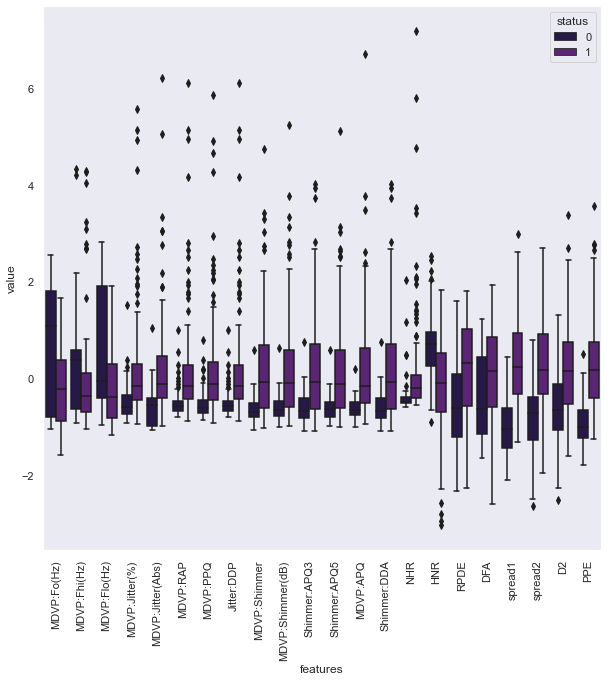

In [236]:
data = pd.concat([Y,X.iloc[:,0:]],axis=1)
data=pd.melt(data,id_vars='status',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot('features','value',hue='status',data=data,)

plt.xticks(rotation=90)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'MDVP:Fo(Hz)'),
  Text(1, 0, 'MDVP:Fhi(Hz)'),
  Text(2, 0, 'MDVP:Flo(Hz)'),
  Text(3, 0, 'MDVP:Jitter(%)'),
  Text(4, 0, 'MDVP:Jitter(Abs)'),
  Text(5, 0, 'MDVP:RAP'),
  Text(6, 0, 'MDVP:PPQ'),
  Text(7, 0, 'Jitter:DDP'),
  Text(8, 0, 'MDVP:Shimmer'),
  Text(9, 0, 'MDVP:Shimmer(dB)'),
  Text(10, 0, 'Shimmer:APQ3'),
  Text(11, 0, 'Shimmer:APQ5'),
  Text(12, 0, 'MDVP:APQ'),
  Text(13, 0, 'Shimmer:DDA'),
  Text(14, 0, 'NHR'),
  Text(15, 0, 'HNR'),
  Text(16, 0, 'RPDE'),
  Text(17, 0, 'DFA'),
  Text(18, 0, 'spread1'),
  Text(19, 0, 'spread2'),
  Text(20, 0, 'D2'),
  Text(21, 0, 'PPE')])

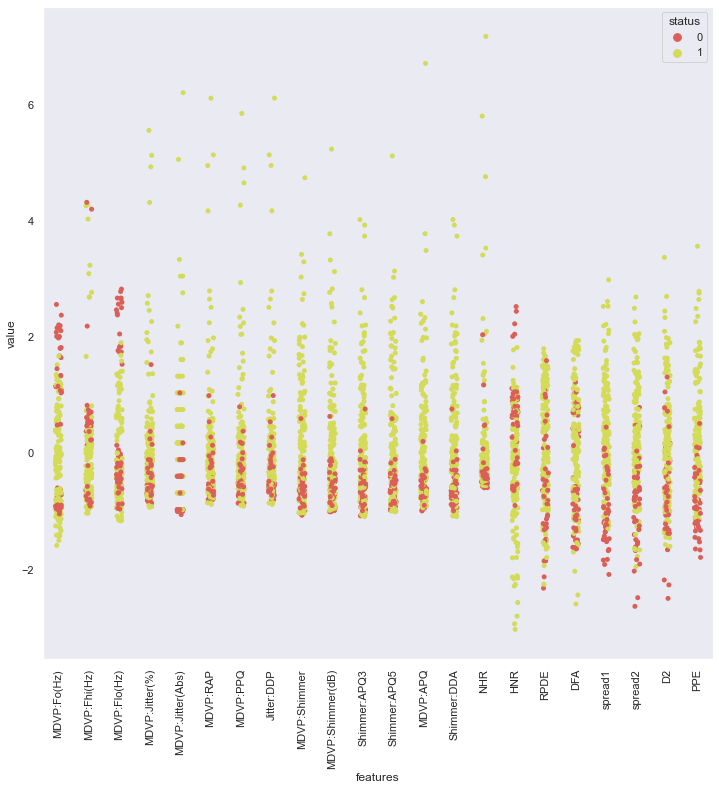

In [254]:
plt.figure(figsize=(12,12))
sns.set(style='dark', color_codes=True,palette="hls")

data = pd.concat([Y,X.iloc[:,0:]],axis=1)
data=pd.melt(data,id_vars='status',var_name='features',value_name='value')
sns.stripplot('features','value',hue='status',data=data,)

plt.xticks(rotation=90)

# Built the model

In [237]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

### Random forest model

In [238]:
random_forest_model=RandomForestClassifier(n_estimators=40)
random_forest_model.fit(x_train,y_train)
random_forest_model.score(x_test,y_test)

0.9230769230769231

### KNN model

In [239]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_model.score(x_test,y_test)

0.9743589743589743

### plot the score

In [240]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.legend()
    plt.show()
    plt.close()

### KNN plot for test data

In [241]:
yhat_test_knn=knn_model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


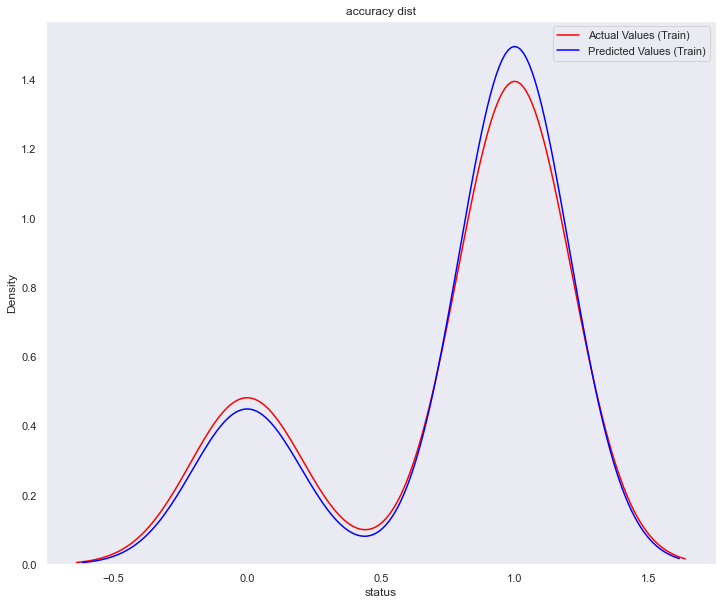

In [242]:
DistributionPlot(y_test, yhat_test_knn, "Actual Values (Train)", "Predicted Values (Train)", "accuracy dist")

### KNN plot for train data

In [244]:
yhat_train_knn=knn_model.predict(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


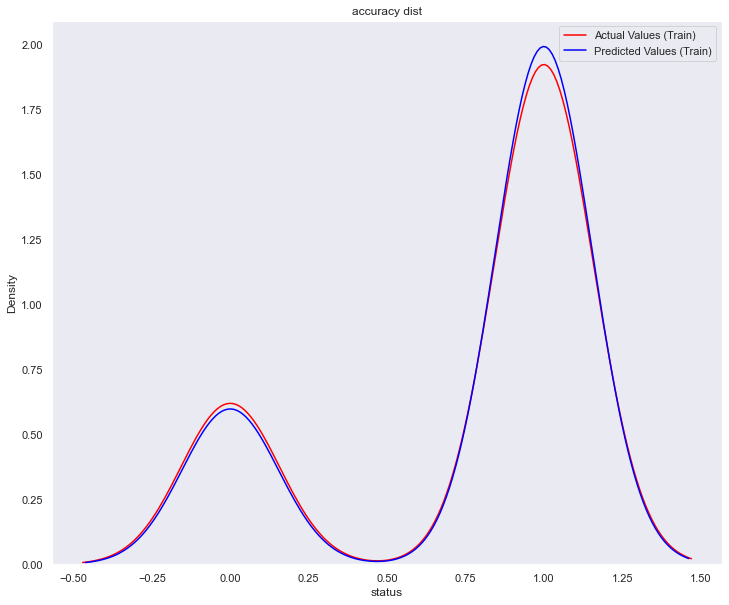

In [264]:
DistributionPlot(y_train, yhat_train_knn, "Actual Values (Train)", "Predicted Values (Train)", "accuracy dist")

# Model evaluation

### for KNN

In [246]:
cm_knn=confusion_matrix(y_test,yhat_test_knn)
cm_knn

array([[ 9,  1],
       [ 0, 29]], dtype=int64)

<AxesSubplot:>

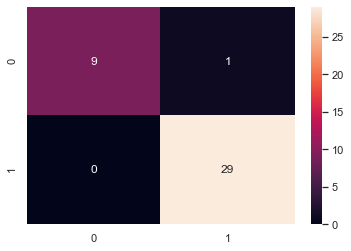

In [247]:
sns.heatmap(cm_knn,annot=True)

In [248]:
print(classification_report(y_test,yhat_test_knn))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



### for Random forest

In [249]:
yhat_test_random_forest=random_forest_model.predict(x_test)

In [250]:
cm_random_forest=confusion_matrix(y_test,yhat_test_random_forest)
cm_random_forest

array([[ 8,  2],
       [ 1, 28]], dtype=int64)

<AxesSubplot:>

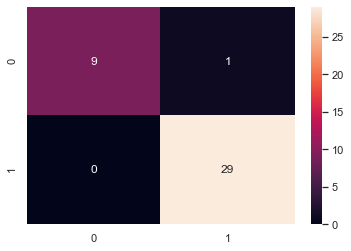

In [251]:
sns.heatmap(cm_knn,annot=True)

In [252]:
print(classification_report(y_test,yhat_test_knn))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

